In [1]:
from statsmodels.tsa.api import ExponentialSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer

In [2]:
df = pd.read_csv(r'..\Data\FB.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600
...,...,...,...,...,...,...,...
1254,2019-12-02,202.130005,202.179993,198.050003,199.699997,199.699997,11503400
1255,2019-12-03,197.600006,198.929993,195.080002,198.820007,198.820007,11595300
1256,2019-12-04,200.000000,200.029999,198.050003,198.710007,198.710007,8456300
1257,2019-12-05,199.860001,201.289993,198.210007,199.360001,199.360001,9740400


In [4]:
X = df['Close']

In [5]:
test = X.iloc[-30:]

In [6]:
train = X.iloc[:-30]

In [ ]:
'''
Holt Winter’s Exponential Smoothing
Parameters: 

    endog (array-like) – Time series
    trend ({"add", "mul", "additive", "multiplicative", None}, optional) – Type of trend component.
    damped (bool, optional) – Should the trend component be damped.
    seasonal ({"add", "mul", "additive", "multiplicative", None}, optional) – Type of seasonal component.
    seasonal_periods (int, optional) – The number of seasons to consider for the holt winters.
    '''


In [ ]:
'''
fit Parameters: 

    smoothing_level (float, optional) – The alpha value of the simple exponential smoothing, if the value is set then this value will be used as the value.
    smoothing_slope (float, optional) – The beta value of the holts trend method, if the value is set then this value will be used as the value.
    smoothing_seasonal (float, optional) – The gamma value of the holt winters seasonal method, if the value is set then this value will be used as the value.
    damping_slope (float, optional) – The phi value of the damped method, if the value is set then this value will be used as the value.
    optimized (bool, optional) – Should the values that have not been set above be optimized automatically?
    use_boxcox ({True, False, 'log', float}, optional) – Should the boxcox tranform be applied to the data first? If ‘log’ then apply the log. If float then use lambda equal to float.
    remove_bias (bool, optional) – Should the bias be removed from the forecast values and fitted values before being returned? Does this by enforcing average residuals equal to zero.
    use_basinhopping (bool, optional) – Should the opptimser try harder using basinhopping to find optimal values?
'''


In [7]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')



In [23]:
from sklearn.model_selection import ParameterGrid
param_grid = {'trend': ['add', 'mul'],'seasonal' :['add', 'mul'],
              'seasonal_periods':[6,12], 
              'smoothing_level': [0.10,.50,.70,.90], 
              'smoothing_slope':[0.10,.50,.70,.90],
              'damping_slope': [0.10,.50,.70,.90],
              'damped' : [True, False], 
              'remove_bias':[True],}
pg = list(ParameterGrid(param_grid))


In [ ]:
df_results_moni = pd.DataFrame(columns=['trend','seasonal_periods','smoothing_level', 'smoothing_slope',
                                        'damping_slope','damped','remove_bias','use_basinhopping','RMSE','r2'])
start = timer()
print('Starting Grid Search..')
for a,b in enumerate(pg):
    trend = b.get('trend')
    smoothing_level = b.get('smoothing_level')
    seasonal_periods = b.get('seasonal_periods')
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    # use_boxcox = b.get('use_boxcox')
    remove_bias = b.get('remove_bias')
    use_basinhopping = b.get('use_basinhopping')
    #print(trend,smoothing_level, smoothing_slope,damping_slope,damped,use_boxcox,remove_bias,use_basinhopping)
    fit1 = ExponentialSmoothing(train,trend=trend, damped=damped,seasonal_periods=seasonal_periods ).fit(smoothing_level=smoothing_level, 
                                    smoothing_slope=smoothing_slope, damping_slope = damping_slope
                                    ,optimized=False)
    #fit1.summary
    z = fit1.forecast(30)
    #print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    #print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'trend':trend,'seasonal_periods':seasonal_periods,'smoothing_level':smoothing_level, 'smoothing_slope':smoothing_slope,
                                        'damping_slope':damping_slope,'damped':damped,'use_basinhopping':use_basinhopping,'RMSE':RMSE,'r2':r2}, ignore_index=True)
print('End of Grid Search')
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


In [25]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)



 Below mentioned parameter gives least RMSE and r2


,trend,seasonal_periods,smoothing_level,smoothing_slope,damping_slope,damped,remove_bias,use_basinhopping,RMSE,r2
533,mul,6,0.7,0.7,0.1,False,NaN,None,2.386851,0.688733


In [11]:
df_results_moni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   trend             108 non-null    object
 1   seasonal_periods  108 non-null    object
 2   smoothing_level   108 non-null    object
 3   smoothing_slope   108 non-null    object
 4   damping_slope     108 non-null    object
 5   damped            108 non-null    object
 6   remove_bias       0 non-null      object
 7   use_basinhopping  108 non-null    object
 8   RMSE              108 non-null    object
 9   r2                108 non-null    object
dtypes: object(10)
memory usage: 8.6+ KB


In [26]:
fit1 = ExponentialSmoothing(train,trend='mul', damped=False,seasonal_periods=6 ).fit(smoothing_level=0.7, 
                                    smoothing_slope=0.7, damping_slope = 0.1,optimized=False)



C:\Users\canut\AppData\Local\Temp\ipykernel_1616\1224100606.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = ExponentialSmoothing(train,trend='mul', damped=False,seasonal_periods=6 ).fit(smoothing_level=0.7,
C:\Users\canut\AppData\Local\Temp\ipykernel_1616\1224100606.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = ExponentialSmoothing(train,trend='mul', damped=False,seasonal_periods=6 ).fit(smoothing_level=0.7,
C:\Newprograms\Anaconda\envs\or\lib\site-packages\pandas\util\_decorators.py:207: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)


In [27]:
Forecast_custom_pred = fit1.forecast(30)

In [28]:
fit1.summary()

Dep. Variable:,Close,No. Observations:,1229
Model:,ExponentialSmoothing,SSE,12219.307
Optimized:,False,AIC,2830.787
Trend:,Multiplicative,BIC,2851.243
Seasonal:,None,AICC,2830.856
Seasonal Periods:,None,Date:,"Fri, 01 Apr 2022"
Box-Cox:,False,Time:,18:36:12
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7000000,alpha,False
smoothing_trend,0.7000000,beta,False


In [29]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 5.697059054191133
MAE is : 1.989762897873527
RMSE is : 2.3868512844731513
MAPE is : 1.018008676762412
R2 is : 0.6887327830369039



In [30]:
# Fitting model with optimized =True
fitESAUTO = ExponentialSmoothing(train).fit(optimized= True, use_brute = True)

In [31]:
fitESAUTO.summary()

Dep. Variable:,Close,No. Observations:,1229
Model:,ExponentialSmoothing,SSE,8965.774
Optimized:,True,AIC,2446.285
Trend:,None,BIC,2456.513
Seasonal:,None,AICC,2446.318
Seasonal Periods:,None,Date:,"Fri, 01 Apr 2022"
Box-Cox:,False,Time:,18:36:22
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9808438,alpha,True
initial_level,76.525912,l.0,True


In [32]:
fitESAUTOpred = fitESAUTO.forecast(30)

In [33]:
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 97.68045012515303
MAE is : 8.909414030331357
RMSE is : 9.883342052420984
MAPE is : 4.516280947193922
R2 is : -4.336915340519627



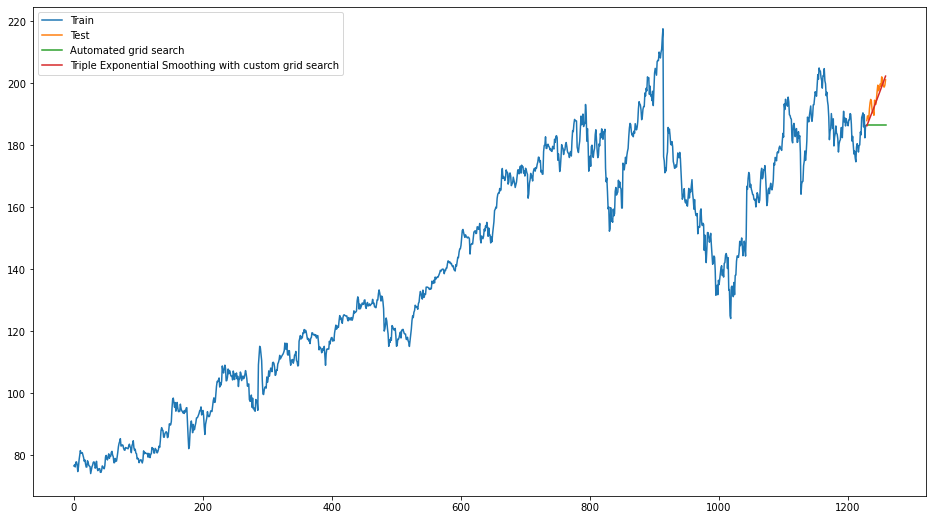

In [34]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Triple Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()